In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
def predator_prey(z,t,params):

    x = z[0]
    y = z[1]
    dxdt = alpha*x - beta*x*y
    dydt = delta*x*y - gamma*y
    return [dxdt, dydt]

[0.124, 0.0075, 0.01, 0.54]


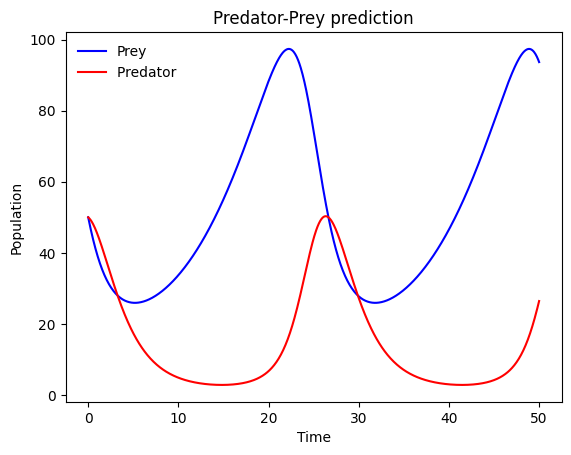

In [5]:
#Define parameters
alpha = 0.124
beta  = 0.0075
delta = 0.01
gamma = 0.54
params = [alpha, beta, delta, gamma]

#Define time range and initial conditions
t = np.linspace(0,50,1000)
initial = [50,50] # [initial_prey, initial_predator]

#Solve the ode system
P = odeint(predator_prey, initial, t, args=(params,))
x = P[:,0]
y = P[:,1]

plt.plot(t, x, color = 'blue', label = 'Prey')
plt.plot(t, y, color = 'red', label = 'Predator ')

#Graphic parameters
plt.title('Predator-Prey prediction')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best', frameon=False)